In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import shap

# Load the processed dataset
train_data_path = "processed_data.csv"  # Update path if needed
df = pd.read_csv(train_data_path)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,...,NB_UNIVERSITÁRIO,NB_VILA RUBIM,hashed_0,hashed_1,hashed_2,hashed_3,hashed_4,hashed_5,hashed_6,hashed_7
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,...,False,False,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,0,0,0,0,...,False,False,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,0,0,0,0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,...,False,False,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,0,1,1,0,...,False,False,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Selected Features (Variance Threshold): 65
Features removed due to high correlation: 6
Top Features (Random Forest): ['Age', 'WaitTime_Age_Interaction', 'WaitTime_RollingMean_3', 'WaitTime', 'WaitTime_Log', 'AppointmentDay_Day', 'WaitTime_Lag_1', 'AppointmentDay_Weekday', 'Gender', 'hashed_6', 'hashed_4', 'hashed_2', 'hashed_3', 'hashed_7', 'hashed_5', 'hashed_1', 'hashed_0', 'AppointmentDay_Month', 'SMS_received', 'Hipertension']


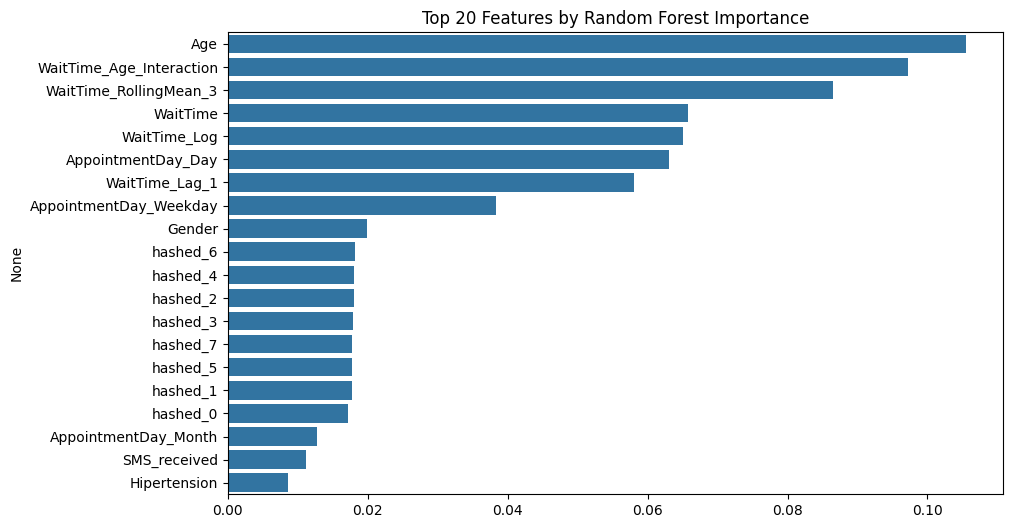


🚀 Feature Selection Completed Successfully!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load Processed Data

# Define Target and Features
TARGET_COLUMN = "No-show"
df["Gender"] = df["Gender"].map({"F": 0, "M": 1})  # Encode Gender


# Drop Unnecessary Columns
df = df.drop(columns=["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"])

# Separate Features and Target
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

# Standardize Features for Model-based Selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Variance Threshold (Remove Low-Variance Features)
var_thresh = VarianceThreshold(threshold=0.01)  # Adjust threshold if needed
X_var = var_thresh.fit_transform(X)

selected_features_var = X.columns[var_thresh.get_support()]
print(f"Selected Features (Variance Threshold): {len(selected_features_var)}")

# Correlation Analysis (Remove Highly Correlated Features)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation > 0.85
to_drop_corr = [column for column in upper.columns if any(upper[column] > 0.85)]
X_corr = X.drop(columns=to_drop_corr)

print(f"Features removed due to high correlation: {len(to_drop_corr)}")

# Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=2025)
rf.fit(X_corr, y)
rf_importances = pd.Series(rf.feature_importances_, index=X_corr.columns).sort_values(ascending=False)

top_rf_features = rf_importances[:20].index.tolist()
print("Top Features (Random Forest):", top_rf_features)

# Plot Feature Importance from Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances.values[:20], y=rf_importances.index[:20])
plt.title("Top 20 Features by Random Forest Importance")
plt.show()

print("\n🚀 Feature Selection Completed Successfully!")


In [3]:
X = df[top_rf_features]
y = df[TARGET_COLUMN]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

In [6]:
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Ensure XGBoost is installed
%pip install xgboost
from xgboost import XGBClassifier

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    return model

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
rf = RandomForestClassifier(random_state=42, n_estimators=100)
xgb = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Evaluate Logistic Regression
print("Logistic Regression Results:")
log_reg = evaluate_model(log_reg, X_train, X_test, y_train, y_test)

# Evaluate Random Forest
print("\nRandom Forest Results:")
rf = evaluate_model(rf, X_train, X_test, y_train, y_test)

# Evaluate XGBoost
print("\nXGBoost Results:")
xgb = evaluate_model(xgb, X_train, X_test, y_train, y_test)

Logistic Regression Results:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7988
Precision: 0.5084
Recall: 0.0204
F1-Score: 0.0393
Confusion Matrix:
 [[17567    88]
 [ 4360    91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     17655
           1       0.51      0.02      0.04      4451

    accuracy                           0.80     22106
   macro avg       0.65      0.51      0.46     22106
weighted avg       0.74      0.80      0.72     22106


Random Forest Results:
Accuracy: 0.8038
Precision: 0.5603
Recall: 0.1180
F1-Score: 0.1949
Confusion Matrix:
 [[17243   412]
 [ 3926   525]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89     17655
           1       0.56      0.12      0.19      4451

    accuracy                           0.80     22106
   macro avg       0.69      0.55      0.54     22106
weighted avg       0.76      0.80      0.75     22106


XGBoost Results:
Accuracy: 0.7993
Preci